## Image Classification using Convolutional Neural Networks (CNNs)

#### Objective:

The objective of this exercise is to provide students with hands-on experience in building, training, and evaluating a Convolutional Neural Network (CNN) for image classification using the Caltech101 dataset. Students will learn the principles of CNNs, including convolutional layers, pooling layers, and fully connected layers, as well as techniques for data augmentation and model evaluation.

#### Dataset:

Caltech101: This dataset contains 101 categories of objects, with approximately 40 to 800 images per category. The images are of various sizes, but most are medium resolution.

# Explicación del Código de Importaciones

En este bloque de código, estamos importando las bibliotecas esenciales para construir y entrenar una red neuronal convolucional (CNN) utilizando TensorFlow y Keras, así como para la visualización y manipulación de datos.

- `tensorflow`: TensorFlow es una plataforma de código abierto para la computación numérica y el aprendizaje automático. Proporciona una amplia gama de herramientas, bibliotecas y recursos comunitarios que facilitan la construcción y el despliegue de modelos de aprendizaje automático.

- `keras.layers`: Keras es una API de alto nivel construida sobre TensorFlow que permite crear y entrenar modelos de aprendizaje profundo de manera fácil e intuitiva. El módulo `layers` proporciona varias capas predefinidas que se pueden usar para construir la arquitectura del modelo.

- `keras.models`: Este módulo permite definir y entrenar modelos de aprendizaje profundo. `models.Sequential` es una manera simple de construir modelos línea por línea.

- `matplotlib.pyplot`: Matplotlib es una biblioteca de visualización de datos en 2D. `pyplot` es una colección de funciones que hacen que Matplotlib funcione como MATLAB, lo que facilita la creación de gráficos y visualizaciones.

- `numpy`: NumPy es una biblioteca fundamental para la computación científica en Python. Proporciona soporte para matrices y operaciones matemáticas avanzadas en ellas.

- `itertools`: Es un módulo que proporciona varias funciones que crean iteradores eficientes. Es útil para realizar manipulaciones de datos de manera eficiente.


In [4]:
# Importamos TensorFlow, que es una biblioteca de código abierto para la computación numérica y el aprendizaje automático.
import tensorflow as tf

# Importamos módulos específicos de Keras, que es una API de alto nivel para construir y entrenar modelos de aprendizaje profundo.
from keras import layers, models

# Importamos Matplotlib para la visualización de datos y resultados.
import matplotlib.pyplot as plt

# Importamos NumPy para operaciones numéricas eficientes en matrices y arreglos.
import numpy as np

# Importamos itertools, una biblioteca para manipulaciones eficientes de iteradores.
import itertools


# División de Datos de Imágenes

El siguiente código se utiliza para dividir un conjunto de imágenes en dos directorios: uno para entrenamiento y otro para prueba. La división se realiza de acuerdo con una proporción definida (en este caso, 80% para entrenamiento y 20% para prueba). Este proceso es útil en tareas de aprendizaje automático, donde se necesita separar los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

## Descripción del Código

1. **Importación de Librerías:**
   - `os`: Proporciona funciones para interactuar con el sistema operativo.
   - `shutil`: Ofrece una serie de operaciones de alto nivel en archivos y colecciones de archivos.
   - `numpy`: Biblioteca fundamental para la computación científica en Python.

2. **Definición de Directorios:**
   - `base_dir`: Directorio original que contiene las imágenes organizadas por categorías.
   - `train_dir` y `test_dir`: Directorios donde se almacenarán las imágenes de entrenamiento y prueba, respectivamente.

3. **Creación de Directorios:**
   - Utiliza `os.makedirs` para crear los directorios de entrenamiento y prueba si no existen.

4. **Proporción de Datos:**
   - `train_ratio`: Proporción de los datos que se destinarán al entrenamiento (en este caso, 80%).

5. **Recorrido de Categorías:**
   - Se recorre cada categoría en el directorio base, se crean subdirectorios correspondientes en los directorios de entrenamiento y prueba, y se dividen las imágenes en función de la proporción definida.

6. **Movimiento de Imágenes:**
   - Las imágenes se barajan aleatoriamente y se dividen en conjuntos de entrenamiento y prueba.
   - Las imágenes se mueven a sus respectivos directorios utilizando `shutil.move`.

## Código 

In [5]:
import os  # Importa el módulo 'os' que proporciona funciones para interactuar con el sistema operativo
import shutil  # Importa el módulo 'shutil' que ofrece una serie de operaciones de alto nivel en archivos y colecciones de archivos
import numpy as np  # Importa la biblioteca 'numpy' y la asigna al alias 'np', que es fundamental para la computación científica en Python

# Directorio original de las imágenes
base_dir = '/home/ronny/Documentos/Deberes/SearchImage/caltech-101'

# Directorios para los datos divididos (entrenamiento y prueba)
train_dir = '/home/ronny/Documentos/Deberes/SearchImage/caltech-101/train'
test_dir = '/home/ronny/Documentos/Deberes/SearchImage/caltech-101/test'

# Crear directorios de entrenamiento y prueba si no existen
os.makedirs(train_dir, exist_ok=True)  # Crea el directorio de entrenamiento si no existe
os.makedirs(test_dir, exist_ok=True)  # Crea el directorio de prueba si no existe

# Proporción de datos de entrenamiento y prueba
train_ratio = 0.8  # Define que el 80% de los datos se utilizarán para entrenamiento y el 20% para prueba

# Recorrer todas las carpetas de categorías en el directorio base
for category in os.listdir(base_dir):  # Itera sobre cada categoría en el directorio base
    category_path = os.path.join(base_dir, category)  # Obtiene la ruta completa de la categoría
    if os.path.isdir(category_path):  # Verifica si la ruta es un directorio
        # Crear subdirectorios en los directorios de entrenamiento y prueba para cada categoría
        os.makedirs(os.path.join(train_dir, category), exist_ok=True)  # Crea el subdirectorio en el directorio de entrenamiento
        os.makedirs(os.path.join(test_dir, category), exist_ok=True)  # Crea el subdirectorio en el directorio de prueba

        # Obtener todas las imágenes de la categoría
        images = os.listdir(category_path)  # Lista todas las imágenes en la categoría
        np.random.shuffle(images)  # Baraja las imágenes aleatoriamente para asegurar una distribución aleatoria

        # Dividir las imágenes en conjuntos de entrenamiento y prueba
        train_size = int(len(images) * train_ratio)  # Calcula el tamaño del conjunto de entrenamiento
        train_images = images[:train_size]  # Selecciona las primeras imágenes para el conjunto de entrenamiento
        test_images = images[train_size:]  # Selecciona las imágenes restantes para el conjunto de prueba

        # Mover las imágenes a los directorios correspondientes
        for image in train_images:  # Itera sobre cada imagen en el conjunto de entrenamiento
            shutil.move(os.path.join(category_path, image), os.path.join(train_dir, category, image))  # Mueve la imagen al directorio de entrenamiento

        for image in test_images:  # Itera sobre cada imagen en el conjunto de prueba
            shutil.move(os.path.join(category_path, image), os.path.join(test_dir, category, image))  # Mueve la imagen al directorio de prueba

print("División de datos completada.")  # Imprime un mensaje indicando que la división de datos se ha completado


División de datos completada.


# Generadores de Datos de Imágenes

El siguiente código utiliza `ImageDataGenerator` de TensorFlow para cargar y preprocesar imágenes, aplicando varias técnicas de aumento de datos al conjunto de entrenamiento y normalizando las imágenes del conjunto de prueba.

## Descripción del Código

1. **Importación de Librerías:**
   - `os`: Proporciona funciones para interactuar con el sistema operativo.
   - `shutil`: Ofrece una serie de operaciones de alto nivel en archivos y colecciones de archivos.
   - `numpy`: Biblioteca fundamental para la computación científica en Python.
   - `ImageDataGenerator`: Es una clase de TensorFlow que permite generar lotes de imágenes tensoriales con aumento de datos en tiempo real.

2. **Generadores de Datos:**
   - `train_datagen`: Generador de datos para el conjunto de entrenamiento. Aplica una serie de transformaciones aleatorias para aumentar la diversidad del conjunto de entrenamiento, lo cual ayuda a prevenir el sobreajuste.
     - `rescale`: Escala los valores de los píxeles a un rango de [0, 1].
     - `rotation_range`: Rotación aleatoria de hasta 40 grados.
     - `width_shift_range` y `height_shift_range`: Desplazamiento horizontal y vertical aleatorio de hasta el 20% del tamaño de la imagen.
     - `shear_range`: Transformación de corte aleatorio.
     - `zoom_range`: Zoom aleatorio en un rango de [0.8, 1.2].
     - `horizontal_flip`: Inversión horizontal aleatoria de las imágenes.
   - `test_datagen`: Generador de datos para el conjunto de prueba. Solo aplica reescalado sin aumentos adicionales para mantener la integridad de las imágenes de prueba.

3. **Configuración de Generadores:**
   - `train_generator`: Configura el generador de datos para el conjunto de entrenamiento.
     - `flow_from_directory`: Carga las imágenes desde un directorio especificado.
     - `target_size`: Redimensiona las imágenes a 224x224 píxeles.
     - `batch_size`: Define el tamaño del lote en 32.
     - `class_mode`: Establece el modo de clase en 'sparse' para etiquetas enteras.
   - `test_generator`: Configura el generador de datos para el conjunto de prueba con las mismas características que el generador de entrenamiento, excepto por las transformaciones de aumento de datos.

4. **Número de Clases:**
   - `num_classes`: Calcula el número de clases en el conjunto de entrenamiento utilizando `class_indices` del `train_generator`.

## Código 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importa ImageDataGenerator de TensorFlow para generar lotes de imágenes tensoriales con aumento de datos en tiempo real

# Generador de datos para el conjunto de entrenamiento con aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Escala los valores de los píxeles a [0, 1]
    rotation_range=40,  # Rotación aleatoria de hasta 40 grados
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio de hasta el 20% del ancho de la imagen
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio de hasta el 20% de la altura de la imagen
    shear_range=0.2,  # Transformación de corte aleatorio
    zoom_range=0.2,  # Zoom aleatorio dentro del rango [0.8, 1.2]
    horizontal_flip=True,  # Inversión horizontal aleatoria de las imágenes
)

# Generador de datos para el conjunto de prueba sin aumento de datos, solo reescalado
test_datagen = ImageDataGenerator(rescale=1./255)

# Generador de datos para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Directorio de las imágenes de entrenamiento
    target_size=(224, 224),  # Redimensiona las imágenes a 224x224 píxeles
    batch_size=32,  # Tamaño del lote
    class_mode='sparse'  # Tipo de etiqueta de clase; 'sparse' es para etiquetas enteras
)

# Generador de datos para el conjunto de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,  # Directorio de las imágenes de prueba
    target_size=(224, 224),  # Redimensiona las imágenes a 224x224 píxeles
    batch_size=32,  # Tamaño del lote
    class_mode='sparse'  # Tipo de etiqueta de clase; 'sparse' es para etiquetas enteras
)

# Número de clases (categorías) en el conjunto de entrenamiento
num_classes = len(train_generator.class_indices)  # Calcula el número de clases en el conjunto de entrenamiento


Found 7709 images belonging to 103 classes.
Found 1435 images belonging to 76 classes.


# Construcción y Compilación de una Red Neuronal Convolucional (CNN)

El siguiente código construye y compila una red neuronal convolucional (CNN) utilizando la biblioteca Keras. Esta red está diseñada para clasificar imágenes en varias categorías.

## Descripción del Código

1. **Importación de Librerías:**
   - `layers` y `models`: Se importan desde Keras para construir y definir los componentes de la red neuronal.

2. **Definición del Modelo:**
   - Se utiliza `Sequential` para construir un modelo secuencial, que es una pila lineal de capas.

3. **Capas de la Red Neuronal:**
   - `Conv2D`: Añade una capa convolucional con filtros, tamaño del kernel, función de activación, y forma de entrada.
   - `MaxPooling2D`: Añade una capa de pooling para reducir la dimensionalidad espacial de las características.
   - `Flatten`: Aplana la salida de la capa convolucional para conectarla con las capas densas.
   - `Dense`: Añade una capa densamente conectada con neuronas y función de activación.

4. **Compilación del Modelo:**
   - `compile`: Configura el modelo con el optimizador, la función de pérdida y las métricas para el entrenamiento.

5. **Resumen del Modelo:**
   - `summary`: Muestra la arquitectura del modelo.

In [7]:
from keras import layers, models  # Importa capas y modelos desde Keras

# Construcción de un modelo secuencial
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Añade una capa convolucional con 32 filtros y una ventana de 3x3, usando ReLU como función de activación, y define la forma de entrada
    layers.MaxPooling2D((2, 2)),  # Añade una capa de MaxPooling con una ventana de 2x2
    layers.Conv2D(64, (3, 3), activation='relu'),  # Añade una segunda capa convolucional con 64 filtros y una ventana de 3x3
    layers.MaxPooling2D((2, 2)),  # Añade una segunda capa de MaxPooling con una ventana de 2x2
    layers.Conv2D(128, (3, 3), activation='relu'),  # Añade una tercera capa convolucional con 128 filtros y una ventana de 3x3
    layers.MaxPooling2D((2, 2)),  # Añade una tercera capa de MaxPooling con una ventana de 2x2
    layers.Flatten(),  # Aplana la salida de la última capa convolucional para conectarla con las capas densas
    layers.Dense(128, activation='relu'),  # Añade una capa densa con 128 neuronas y ReLU como función de activación
    layers.Dense(num_classes, activation='softmax')  # Añade una capa densa final con un número de neuronas igual al número de clases, usando softmax como función de activación
])

# Compilación del modelo
model.compile(optimizer='adam',  # Usa Adam como optimizador
              loss='sparse_categorical_crossentropy',  # Usa sparse categorical crossentropy como función de pérdida
              metrics=['accuracy'])  # Usa la precisión como métrica de evaluación

# Mostrar la arquitectura del modelo
model.summary()  # Muestra un resumen de las capas del modelo y sus formas


/home/ronny/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 103)            │        13,287 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,182,247 (42.66 MB)

 Trainable params: 11,182,247 (42.66 MB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento del Modelo

El siguiente código entrena la red neuronal convolucional (CNN) previamente definida utilizando los generadores de datos de entrenamiento y prueba. La función `fit` es utilizada para ajustar el modelo a los datos.

## Descripción del Código

1. **Entrenamiento del Modelo:**
   - `model.fit`: Ajusta el modelo a los datos proporcionados por `train_generator` durante un número de épocas especificado y valida el modelo utilizando `test_generator`.

2. **Parámetros de Entrenamiento:**
   - `train_generator`: Generador de datos para el conjunto de entrenamiento.
   - `epochs`: Número de veces que el modelo verá el conjunto de datos completo durante el entrenamiento.
   - `validation_data`: Generador de datos para el conjunto de validación (prueba).

In [8]:
# Entrenamiento del modelo
history = model.fit(
    train_generator,  # Generador de datos para el conjunto de entrenamiento
    epochs=10,  # Número de épocas de entrenamiento
    validation_data=test_generator  # Generador de datos para el conjunto de validación (prueba)
)

Epoch 1/10


/home/ronny/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


241/241 ━━━━━━━━━━━━━━━━━━━━ 123s 504ms/step - accuracy: 0.1188 - loss: 4.2160 - val_accuracy: 0.0523 - val_loss: 5.2511
Epoch 2/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 127s 523ms/step - accuracy: 0.2691 - loss: 3.4228 - val_accuracy: 0.0704 - val_loss: 5.9927
Epoch 3/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 130s 535ms/step - accuracy: 0.3062 - loss: 3.1444 - val_accuracy: 0.0927 - val_loss: 6.3877
Epoch 4/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 139s 573ms/step - accuracy: 0.3171 - loss: 2.9789 - val_accuracy: 0.0808 - val_loss: 6.8270
Epoch 5/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 136s 561ms/step - accuracy: 0.3578 - loss: 2.7574 - val_accuracy: 0.0697 - val_loss: 7.6632
Epoch 6/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 129s 530ms/step - accuracy: 0.3725 - loss: 2.6803 - val_accuracy: 0.0885 - val_loss: 8.9037
Epoch 7/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 134s 552ms/step - accuracy: 0.3966 - loss: 2.5233 - val_accuracy: 0.0997 - val_loss: 7.6316
Epoch 8/10
241/241 ━━━━━━━━━━━━━━━━━━━━ 128s 528ms/step - accuracy: 0.3937 - loss: 2.51

# Evaluación del Modelo

El siguiente código evalúa el rendimiento del modelo entrenado utilizando el conjunto de datos de prueba. La función `evaluate` calcula la pérdida y la precisión del modelo en los datos de prueba.

## Descripción del Código

1. **Evaluación del Modelo:**
   - `model.evaluate`: Evalúa el modelo utilizando los datos proporcionados por `test_generator` y devuelve la pérdida y la precisión.

2. **Impresión de Resultados:**
   - Se imprime la precisión del modelo en el conjunto de datos de prueba en formato porcentual.


In [9]:
# Evaluación del modelo
loss, accuracy = model.evaluate(test_generator)  # Evalúa el modelo en el conjunto de datos de prueba y devuelve la pérdida y la precisión
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")  # Imprime la precisión del modelo en el conjunto de datos de prueba en formato porcentual


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.0991 - loss: 7.6823
Accuracy on the test set: 9.48%


# Visualización de Imágenes Mal Clasificadas

El siguiente código extrae y visualiza imágenes del conjunto de prueba que fueron mal clasificadas por el modelo entrenado. Esto es útil para entender mejor los errores del modelo y las áreas que podrían necesitar mejoras.

## Descripción del Código

1. **Importación de Librerías:**
   - `matplotlib.pyplot`: Utilizada para la visualización de las imágenes.
   - `numpy`: Utilizada para manipular los datos de las imágenes y las etiquetas.

2. **Extracción de Imágenes Mal Clasificadas:**
   - Se recorren las imágenes del generador de prueba y se obtienen las predicciones del modelo.
   - Se comparan las etiquetas predichas con las etiquetas reales para identificar las imágenes mal clasificadas.

3. **Visualización de Imágenes Mal Clasificadas:**
   - Se limitan las imágenes mal clasificadas a 25 para facilitar la visualización.
   - Se muestran las imágenes mal clasificadas con sus etiquetas predichas.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


ValueError: num must be an integer with 1 <= num <= 25, not 26

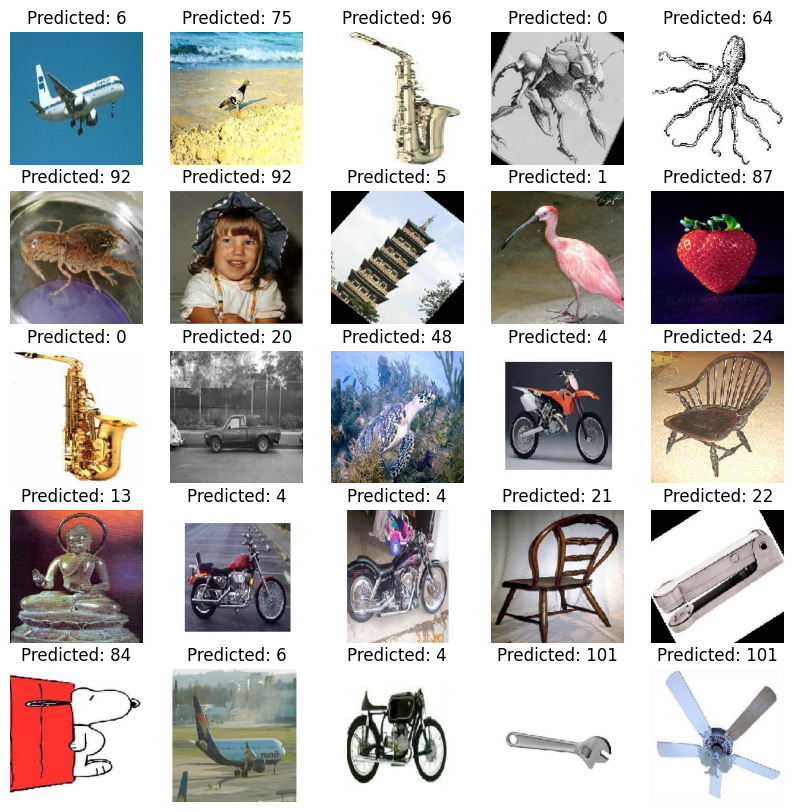

In [10]:
import matplotlib.pyplot as plt  # Importa matplotlib.pyplot para la visualización de las imágenes
import numpy as np  # Importa numpy para manipular datos

# Obtener imágenes mal clasificadas
misclassified_images = []  # Lista para almacenar las imágenes mal clasificadas
misclassified_labels = []  # Lista para almacenar las etiquetas predichas incorrectamente

# Iterar sobre el generador de datos de prueba
for images, labels in test_generator:
    predictions = model.predict(images)  # Obtener las predicciones del modelo
    predicted_labels = np.argmax(predictions, axis=1)  # Obtener las etiquetas predichas
    misclassified_idx = np.where(predicted_labels != labels)[0]  # Identificar los índices de las imágenes mal clasificadas
    for idx in misclassified_idx:  # Iterar sobre los índices de las imágenes mal clasificadas
        misclassified_images.append(images[idx])  # Agregar la imagen mal clasificada a la lista
        misclassified_labels.append(predicted_labels[idx])  # Agregar la etiqueta predicha incorrectamente a la lista
    if len(misclassified_images) >= 25:  # Limitar a 25 imágenes
        break  # Romper el bucle si ya se han obtenido 25 imágenes mal clasificadas

# Visualización de imágenes mal clasificadas
plt.figure(figsize=(10, 10))  # Crear una nueva figura para la visualización
for i in range(len(misclassified_images)):  # Iterar sobre las imágenes mal clasificadas
    plt.subplot(5, 5, i+1)  # Crear subtramas de 5x5
    plt.imshow(misclassified_images[i])  # Mostrar la imagen mal clasificada
    plt.title(f"Predicted: {misclassified_labels[i]}")  # Añadir el título con la etiqueta predicha
    plt.axis('off')  # Ocultar los ejes
plt.show()  # Mostrar la figura

# Predicción de una Imagen de Muestra

El siguiente código selecciona una imagen de muestra del conjunto de prueba y la pasa a través del modelo para obtener su predicción. Este proceso es útil para verificar el funcionamiento del modelo con una sola imagen y visualizar la predicción correspondiente.

## Descripción del Código

1. **Selección de una Imagen de Muestra:**
   - Se obtiene una imagen de muestra del generador de datos de prueba.

2. **Predicción del Modelo:**
   - La imagen de muestra se pasa a través del modelo para obtener su predicción.


In [13]:
# Seleccionar una imagen de muestra del conjunto de prueba
sample_image, _ = next(iter(test_generator))  # Obtiene el siguiente lote del generador de prueba
sample_image = sample_image[:1]  # Selecciona solo la primera imagen del lote

# Pasar la imagen a través del modelo para definir su entrada
_ = model.predict(sample_image)  # Realiza una predicción con la imagen de muestra

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


# Visualización de Activaciones de Capas

El siguiente código crea un modelo para obtener las activaciones de todas las capas de la red neuronal convolucional (CNN) y visualiza estas activaciones para una imagen de muestra. Este proceso ayuda a entender cómo el modelo procesa la información en cada capa.

## Descripción del Código

1. **Creación del Modelo de Activaciones:**
   - Se crea un nuevo modelo que tiene como entrada la misma entrada del modelo original y como salida las salidas de todas las capas del modelo original.

2. **Obtención de las Activaciones:**
   - Se pasa una imagen de muestra a través del modelo de activaciones para obtener las activaciones de cada capa.

3. **Visualización de las Activaciones:**
   - Se visualizan las activaciones de las capas convolucionales utilizando `matplotlib`.

In [ ]:
# Crear un modelo para obtener las activaciones de las capas
activation_model = models.Model(inputs=model.input, outputs=[layer.output for layer in model.layers])  # Crea un nuevo modelo que tiene como salida las salidas de todas las capas del modelo original

# Obtener las activaciones
activations = activation_model.predict(sample_image)  # Obtiene las activaciones de todas las capas para la imagen de muestra

# Visualizar las activaciones
plt.figure(figsize=(15, 15))  # Define el tamaño de la figura para la visualización
layer_names = [layer.name for layer in model.layers]  # Obtiene los nombres de las capas del modelo original

for i, activation in enumerate(activations):  # Itera sobre cada activación y su índice
    if len(activation.shape) == 4:  # Ignora las capas que no son convolucionales (que no tienen 4 dimensiones)
        plt.subplot(5, 5, i+1)  # Crea subtramas de 5x5
        plt.imshow(activation[0, :, :, 0], cmap='viridis')  # Muestra la activación de la primera capa convolucional con un mapa de colores 'viridis'
        plt.title(layer_names[i])  # Añade el título con el nombre de la capa
        plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra la figura

# Predicción de una Imagen de Consulta

El siguiente código carga una imagen de consulta, la preprocesa y la pasa a través del modelo para obtener su predicción. Finalmente, se muestra la imagen de consulta junto con la clase predicha.

## Descripción del Código

1. **Función para Cargar y Preprocesar la Imagen de Consulta:**
   - La función `load_and_preprocess_image` carga una imagen desde una ruta especificada, la redimensiona, la convierte en un array de NumPy, normaliza los valores de los píxeles y añade una dimensión extra para que el array sea compatible con el modelo.

2. **Ruta a la Imagen de Consulta:**
   - Se especifica la ruta de la imagen que se desea predecir.

3. **Cargar y Preprocesar la Imagen de Consulta:**
   - Se utiliza la función `load_and_preprocess_image` para cargar y preprocesar la imagen de consulta.

4. **Realizar la Predicción:**
   - La imagen de consulta se pasa a través del modelo para obtener su predicción.

5. **Mostrar la Imagen de Consulta y la Predicción:**
   - Se muestra la imagen de consulta junto con la clase predicha utilizando `matplotlib`.


In [ ]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Función para cargar y preprocesar la imagen de consulta
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Cargar la imagen y redimensionarla
    img_array = image.img_to_array(img)  # Convertir la imagen en un array de NumPy
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para que sea compatible con el modelo
    img_array /= 255.0  # Normalizar la imagen
    return img_array

# Ruta a la imagen de consulta
query_image_path = 'C:/Users/Ronny Amores/Downloads/w3scrp.jpg'  # Reemplaza con la ruta de tu imagen

# Cargar y preprocesar la imagen de consulta
query_image = load_and_preprocess_image(query_image_path)

# Realizar la predicción
prediction = model.predict(query_image)  # Pasar la imagen de consulta a través del modelo
predicted_class = np.argmax(prediction, axis=1)  # Obtener la clase predicha con la mayor probabilidad

# Mostrar la imagen de consulta y la predicción
plt.figure()  # Crear una nueva figura
plt.imshow(image.array_to_img(query_image[0]))  # Mostrar la imagen de consulta
plt.title(f"Predicted Class: {predicted_class[0]}")  # Añadir el título con la clase predicha
plt.axis('off')  # Ocultar los ejes
plt.show()  # Mostrar la figura